In [1]:
import statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [2]:
data = sm.datasets.sunspots.load_pandas()
dataframe = data.data

In [3]:
dataframe['YEAR'] = pd.to_datetime(dataframe['YEAR'], format='%Y')
dataframe.index = dataframe['YEAR']
del dataframe['YEAR']

In [4]:
dataframe.head()

,SUNACTIVITY
YEAR,
1700-01-01,5.0
1701-01-01,11.0
1702-01-01,16.0
1703-01-01,23.0
1704-01-01,36.0


In [5]:
dataframe.shape

(309, 1)

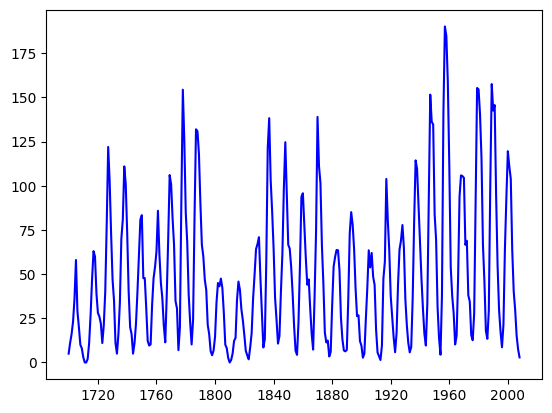

In [7]:
plt.plot(dataframe, color = 'blue')

In [8]:
decomposition = seasonal_decompose(dataframe['SUNACTIVITY'], model = 'additive', period = 11)

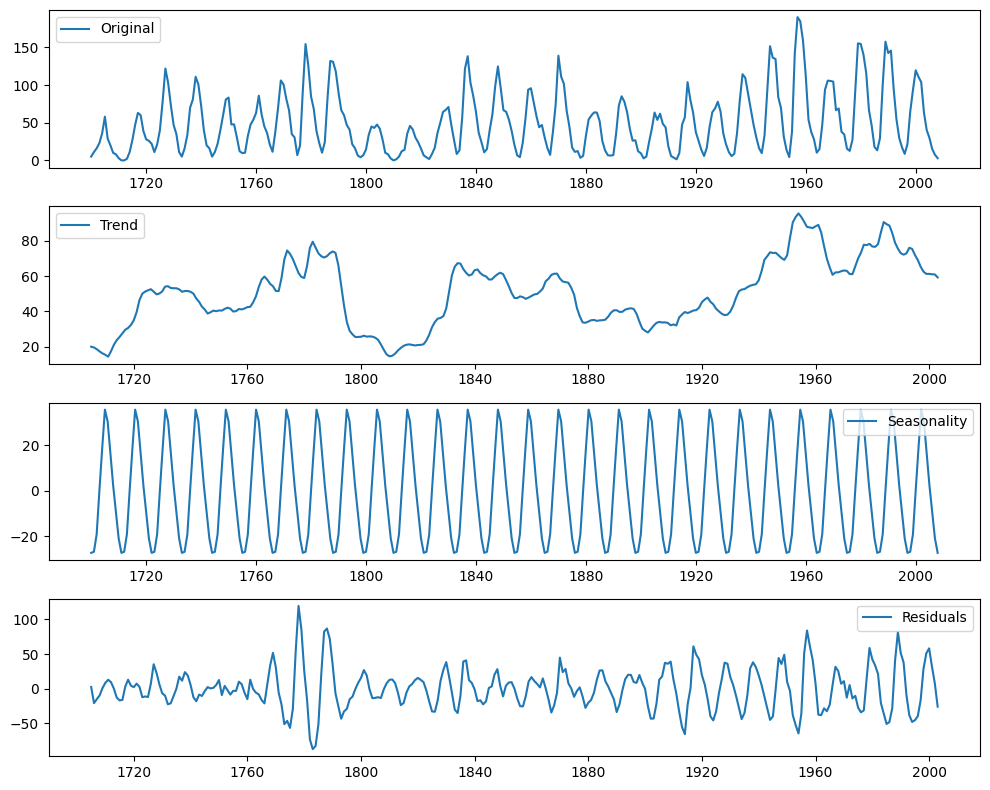

In [9]:
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
ax[0].plot(dataframe['SUNACTIVITY'], label='Original')
ax[0].legend(loc='best')
ax[1].plot(decomposition.trend, label='Trend')
ax[1].legend(loc='best')
ax[2].plot(decomposition.seasonal,label='Seasonality')
ax[2].legend(loc='best')
ax[3].plot(decomposition.resid, label='Residuals')
ax[3].legend(loc='best')
plt.tight_layout()
plt.show()

In [10]:
test_stat = adfuller(dataframe)
if test_stat[0] < test_stat[4]['10%']:
    print(f"p-value {test_stat[1]}, critical values: {test_stat[4]}, stationary time series")
else:
    print(f"p-value {test_stat[1]}, critical values: {test_stat[4]}, NOT stationary time series")

p-value 0.05307642172812041, critical values: {'1%': -3.4523371197407404, '5%': -2.871222860740741, '10%': -2.571929211111111}, stationary time series


In [11]:
for i in range(1, 13):
    autocorr_lag = dataframe['SUNACTIVITY'].autocorr(lag = i)
    print(f"{i} year lag: {autocorr_lag}")

1 year lag: 0.8236288837177274
2 year lag: 0.4546179988775737
3 year lag: 0.039874664758565076
4 year lag: -0.2789895531196348
5 year lag: -0.43024863085060866
6 year lag: -0.38112013056812055
7 year lag: -0.15984213890009077
8 year lag: 0.16131299934421808
9 year lag: 0.4857862883760332
10 year lag: 0.6793049702157588
11 year lag: 0.6721213066213503
12 year lag: 0.47365972969783576


- ряд є стаціонарним, без сезонності та вираженого тренду, є цикличні складова, яка повторюється кожні 11 років

In [83]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2]) for x in list(itertools.product(p, d, q))]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.arima.ARIMA(dataframe, order=param)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0) - AIC:3166.5832226720604
ARIMA(0, 0, 0)x(0, 0, 1) - AIC:3166.5832226720604
ARIMA(0, 0, 0)x(0, 1, 0) - AIC:3166.5832226720604
ARIMA(0, 0, 0)x(0, 1, 1) - AIC:3166.5832226720604
ARIMA(0, 0, 0)x(1, 0, 0) - AIC:3166.5832226720604
ARIMA(0, 0, 0)x(1, 0, 1) - AIC:3166.5832226720604
ARIMA(0, 0, 0)x(1, 1, 0) - AIC:3166.5832226720604
ARIMA(0, 0, 0)x(1, 1, 1) - AIC:3166.5832226720604
ARIMA(0, 0, 1)x(0, 0, 0) - AIC:2886.9006695628577
ARIMA(0, 0, 1)x(0, 0, 1) - AIC:2886.9006695628577
ARIMA(0, 0, 1)x(0, 1, 0) - AIC:2886.9006695628577
ARIMA(0, 0, 1)x(0, 1, 1) - AIC:2886.9006695628577
ARIMA(0, 0, 1)x(1, 0, 0) - AIC:2886.9006695628577
ARIMA(0, 0, 1)x(1, 0, 1) - AIC:2886.9006695628577
ARIMA(0, 0, 1)x(1, 1, 0) - AIC:2886.9006695628577
ARIMA(0, 0, 1)x(1, 1, 1) - AIC:2886.9006695628577
ARIMA(0, 1, 0)x(0, 0, 0) - AIC:2833.115798326172
ARIMA(0, 1, 0)x(0, 0, 1) - AIC:2833.115798326172
ARIMA(0, 1, 0)x(0, 1, 0) - AIC:2833.115798326172
ARIMA(0, 1, 0)x(0, 1, 1) - AIC:2833.115798326172
ARIM

- згідно отриманих значень найнижчого AIC, часовий ряд не потрібно диференціювати і доцільніше використати модель типу ARMA 

In [84]:
mod = sm.tsa.arima.ARIMA(dataframe, order=(1, 0, 1))

In [85]:
results = mod.fit()

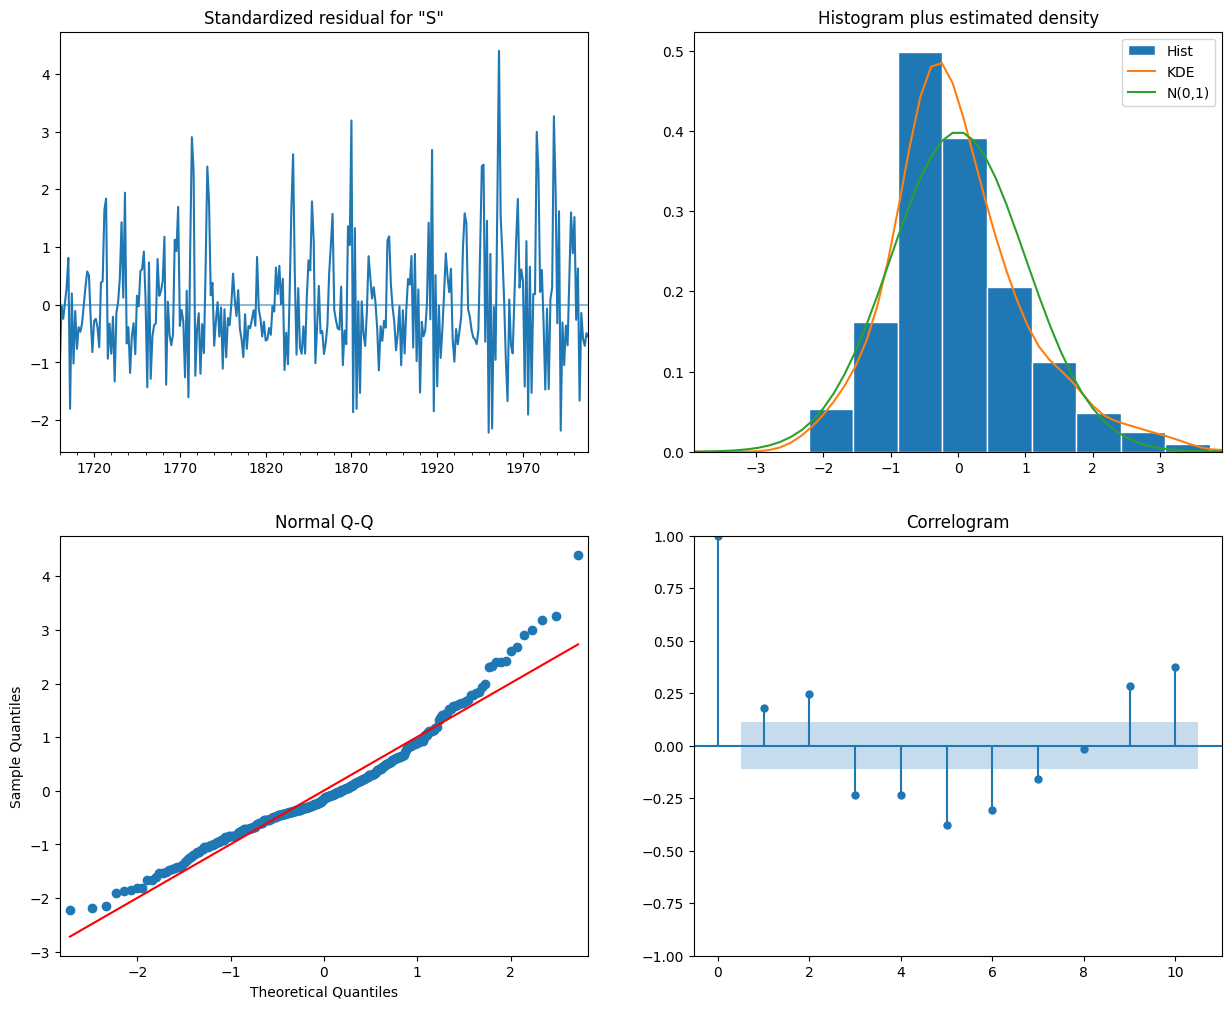

In [86]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [87]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1352.613
Date:                Fri, 10 Mar 2023   AIC                           2713.226
Time:                        17:13:04   BIC                           2728.160
Sample:                    01-01-1700   HQIC                          2719.197
                         - 01-01-2008                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.7921      8.077      6.041      0.000      32.962      64.623
ar.L1          0.7355      0.046     15.921      0.000       0.645       0.826
ma.L1          0.5194      0.048     10.798      0.000       0.425       0.614
sigma2       369.1788     25.783     14.319      0.000     318.646     419.712
===================================================================================
Ljung-Box (L1) (Q):                   9.89   Jarque-Bera (JB):                73.24
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.93   Skew:                             0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

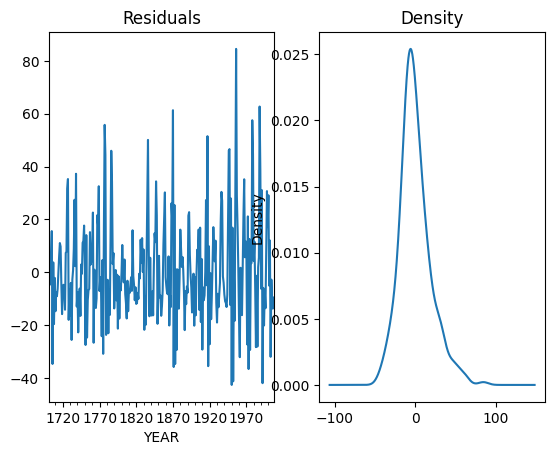

In [88]:
residuals = results.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

In [89]:
forecast_or = results.predict(start=0,end=330,dynamic=False)
# forecast = results.predict(start=307,end=330,dynamic=True)

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [92]:
mae = mean_absolute_error(dataframe, forecast_or[:309])
rmse = np.sqrt(mean_squared_error(dataframe, forecast_or[:309]))
r2 = r2_score(dataframe, forecast_or[:309])
mae, rmse, r2

(14.465309461425829, 19.338700584258593, 0.7707182067781486)

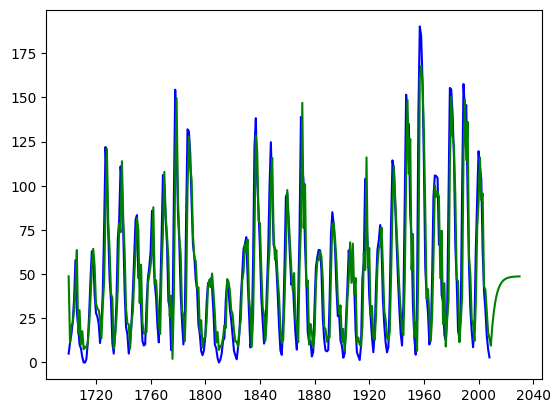

In [93]:
plt.plot(dataframe, color = 'blue')
plt.plot(forecast_or, color = 'green')
# plt.plot(forecast, color = 'red')

In [101]:
pred_uc = results.get_forecast(steps=20)

pred_ci = pred_uc.conf_int()

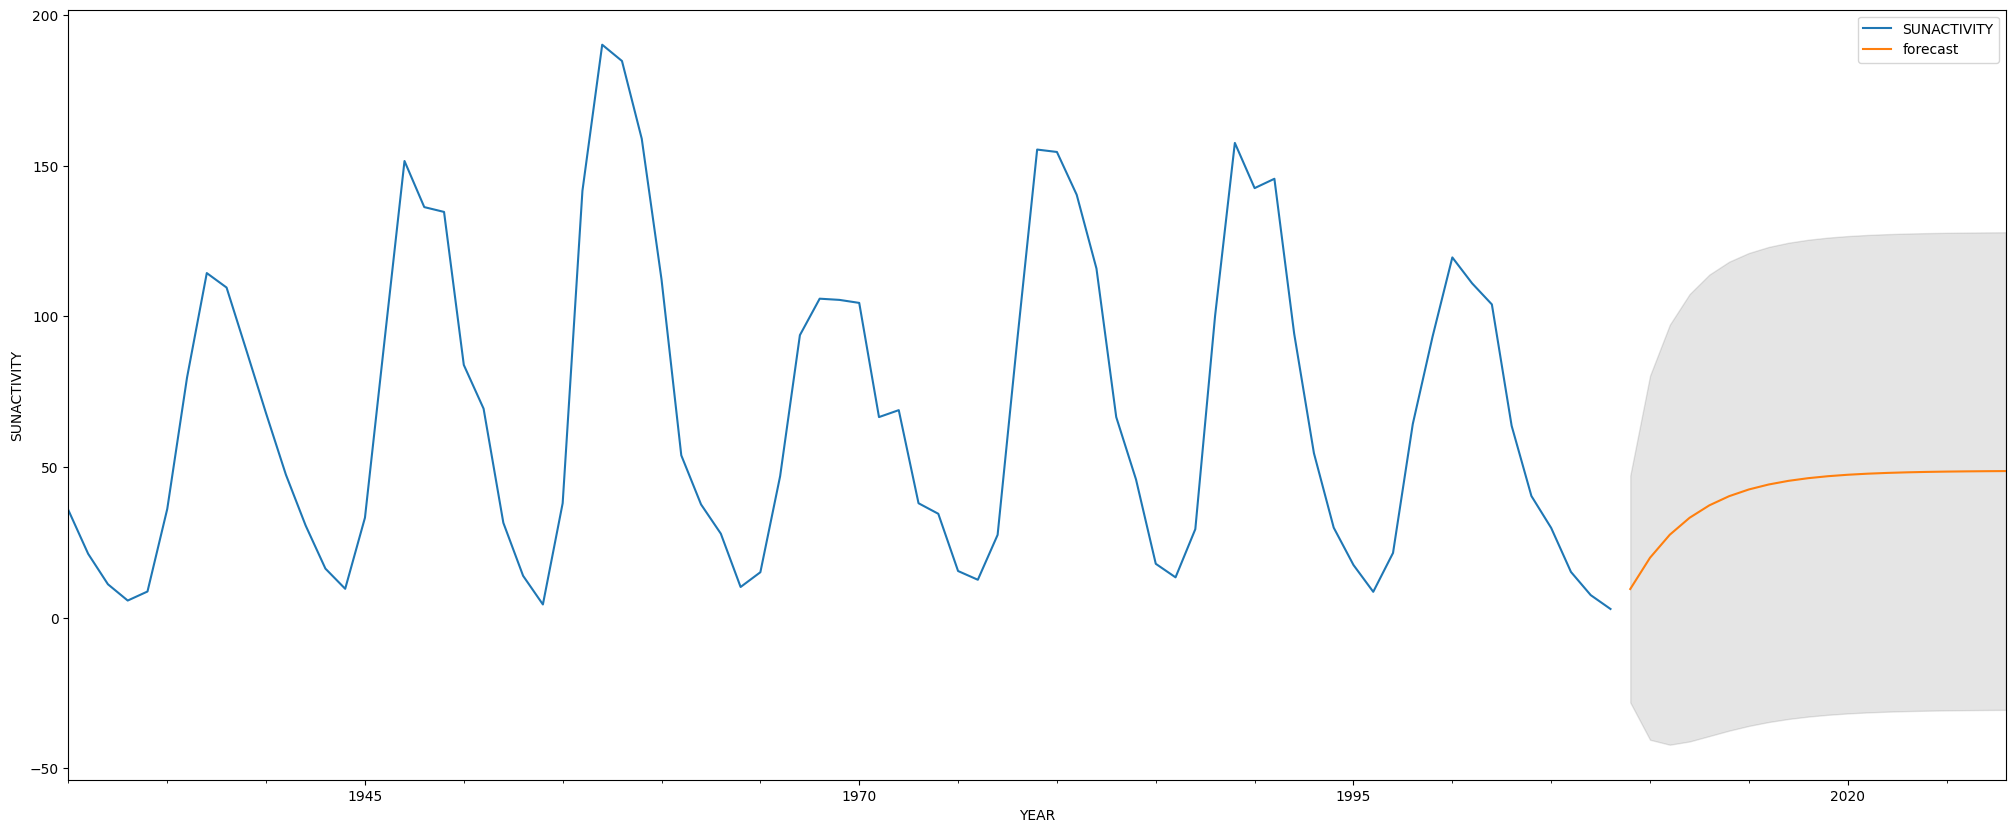

In [112]:
ax = dataframe[230:].plot(label='sunspot until 2008', figsize=(25, 10))
pred_uc.predicted_mean.plot(ax=ax, label='forecast')
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.1)
ax.set_xlabel('YEAR')
ax.set_ylabel('SUNACTIVITY')
plt.legend()
plt.show()